In [36]:
import pandas as pd
data = pd.read_csv("heart_disease_uci.csv")

In [37]:
data.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [38]:
data.shape[0]

920

In [39]:
data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [40]:
data = data.dropna()

In [41]:
import numpy as np
def find_outliers(mydata, column_name):
    q1 = np.quantile(mydata[column_name], 0.25)
    q3 = np.quantile(mydata[column_name], 0.75)
    iqr = q3 - q1
    mini = q1 - 1.5*iqr 
    maxi = q3 + 1.5*iqr

    filtro = (mydata[column_name] < mini) | (mydata[column_name] > maxi)
    return mydata[filtro], mini, maxi

In [42]:
outliers_chol = find_outliers(data, "chol")

<Axes: ylabel='chol'>

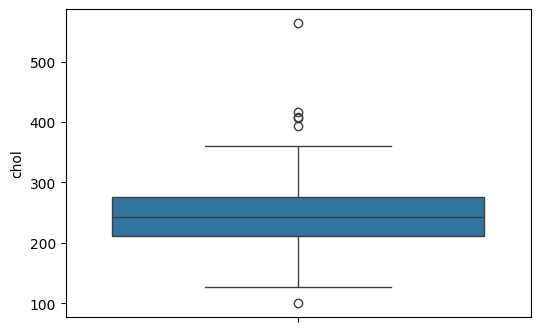

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

colesterol = data['chol']
plt.figure(figsize=(6, 4))
sns.boxplot(y=colesterol)

<Figure size 400x1400 with 0 Axes>

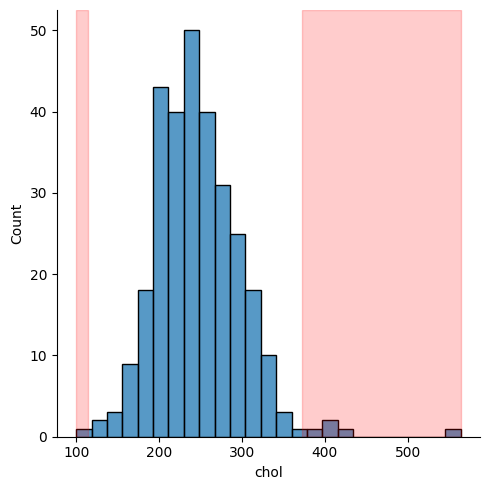

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 14))
sns.displot(data['chol'], kde=False)

mis_outliers, mini, maxi = find_outliers(data, 'chol')

plt.axvspan(xmin=mini, xmax=data['chol'].min(), color='red', alpha=0.2)
plt.axvspan(xmin=maxi, xmax=data['chol'].max(), color='red', alpha=0.2)

In [47]:
def outliers_standard(mydata, columna):
    mean = mydata[columna].mean()
    std = mydata[columna].std()

    mini = mean - 3*std
    maxi = mean + 3*std
    filtro = (mydata[columna] < mini) | (mydata[columna] > maxi)
    return mydata[filtro], mini, maxi


In [48]:
col_anomalies_std = outliers_standard(data, "chol")

<Figure size 400x1400 with 0 Axes>

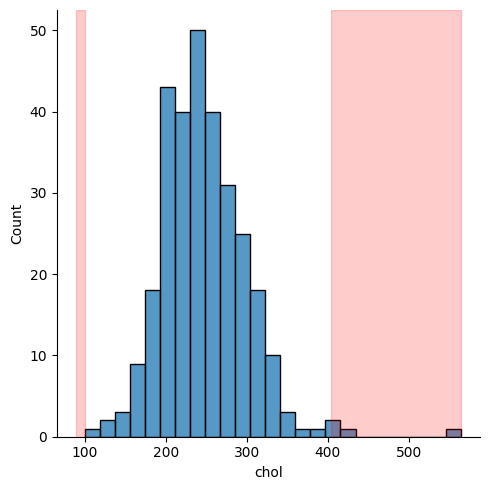

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(4, 14))
sns.displot(data['chol'], kde=False)

mis_outliers, mini, maxi = outliers_standard(data, 'chol')

plt.axvspan(xmin=mini, xmax=data['chol'].min(), color='red', alpha=0.2)
plt.axvspan(xmin=maxi, xmax=data['chol'].max(), color='red', alpha=0.2)

In [ ]:
!pip install scikit-learn

In [32]:
from sklearn.datasets import load_diabetes

data = load_diabetes()